In [57]:
#Importer les librairies n√©cessaires pour faire une regression lin√©aire 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

In [26]:
#Importer les librairies n√©cessaires pour faire une regression lin√©aire 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np # Not always necessary
import matplotlib.pyplot as plt # Not always necessary
import seaborn as sns # Not always necessary
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

In [58]:
#Importer le fichier csv
df= pd.read_csv("/Users/amysarr/Desktop/FORMATION JEDHA/PROJET ESSENTIELS STUDENT/student_performance.csv")
print(df.head())

   student_id  weekly_self_study_hours  attendance_percentage  \
0           1                     18.5                   95.6   
1           2                     14.0                   80.0   
2           3                     19.5                   86.3   
3           4                     25.7                   70.2   
4           5                     13.4                   81.9   

   class_participation  total_score grade  
0                  3.8         97.9     A  
1                  2.5         83.9     B  
2                  5.3        100.0     A  
3                  7.0        100.0     A  
4                  6.9         92.0     A  


In [59]:
df_clean= df.drop(columns=["student_id"])
print(df_clean)
#gerer les NUUL
#df_clean= df_clean.dropna() #on peut aussi utiliser SimpleImputer
print(df_clean.isnull().sum())  #verifier qu'il n'y a plus de null
print(df_clean.info()) #verifier le type de chaque colonne  

        weekly_self_study_hours  attendance_percentage  class_participation  \
0                          18.5                   95.6                  3.8   
1                          14.0                   80.0                  2.5   
2                          19.5                   86.3                  5.3   
3                          25.7                   70.2                  7.0   
4                          13.4                   81.9                  6.9   
...                         ...                    ...                  ...   
999995                     18.0                   95.5                  4.8   
999996                     15.7                   82.7                  6.7   
999997                     14.2                   85.1                  5.8   
999998                     25.3                   90.0                  5.3   
999999                     18.3                   84.6                  4.1   

        total_score grade  
0              97.9    

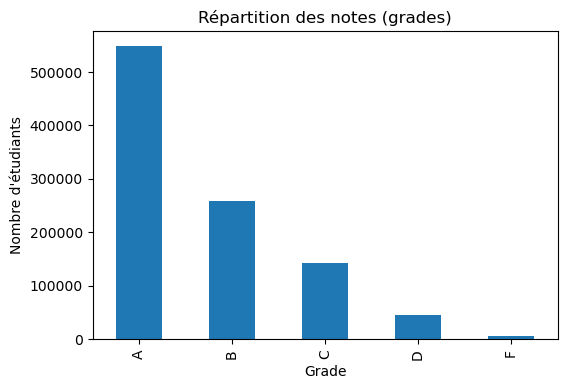

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
df['grade'].value_counts().sort_index().plot(kind='bar')
plt.title("R√©partition des notes (grades)")
plt.xlabel("Grade")
plt.ylabel("Nombre d'√©tudiants")
plt.show()

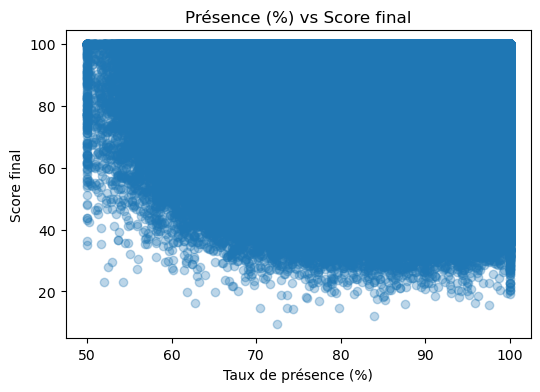

In [61]:
#Corr√©lation Pr√©sence (%) vs Score final
#Objectif : v√©rifier si les √©tudiants plus assidus r√©ussissent mieux.
plt.figure(figsize=(6,4))
plt.scatter(df['attendance_percentage'], df['total_score'], alpha=0.3)
plt.title("Pr√©sence (%) vs Score final")
plt.xlabel("Taux de pr√©sence (%)")
plt.ylabel("Score final")
plt.show()

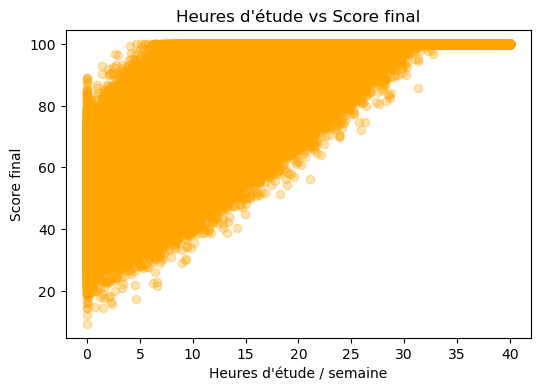

In [31]:
#Corr√©lation Heures d‚Äô√©tude par semaine vs Score final
#Objectif : voir si plus d‚Äôheures d‚Äô√©tude ‚Üí meilleures notes.
plt.figure(figsize=(6,4))
plt.scatter(df['weekly_self_study_hours'], df['total_score'], alpha=0.3, color="orange")
plt.title("Heures d'√©tude vs Score final")
plt.xlabel("Heures d'√©tude / semaine")
plt.ylabel("Score final")
plt.show()

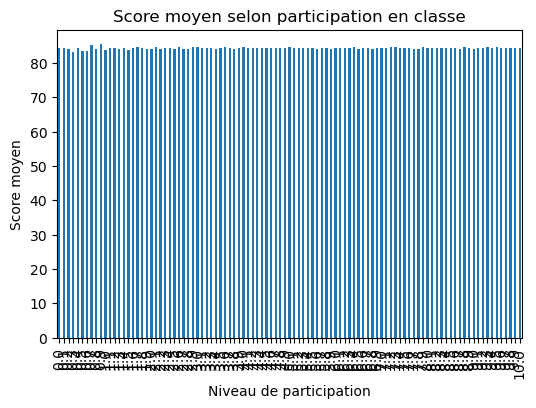

In [62]:
#Moyenne des scores par niveau de participation
#Objectif : mesurer l‚Äôimpact de la participation en classe.
df.groupby('class_participation')['total_score'].mean().plot(kind='bar', figsize=(6,4))
plt.title("Score moyen selon participation en classe")
plt.xlabel("Niveau de participation")
plt.ylabel("Score moyen")
plt.show()

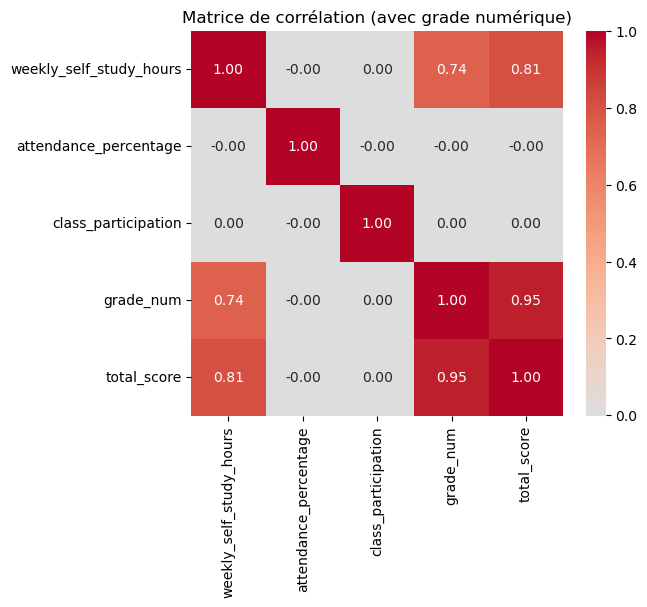

In [63]:

mapping = {'A':4, 'B':3, 'C':2, 'D':1, 'F':0}
df['grade_num'] = df['grade'].map(mapping)  
cols = ['weekly_self_study_hours','attendance_percentage',
        'class_participation','grade_num','total_score']

plt.figure(figsize=(6,5))
sns.heatmap(df[cols].corr(), annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Matrice de corr√©lation (avec grade num√©rique)")
plt.show()

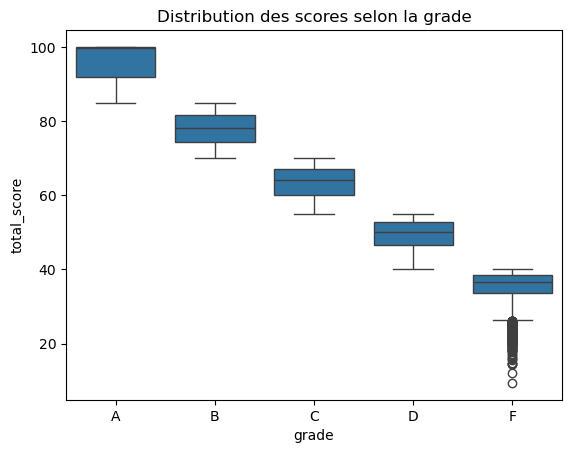

In [64]:
sns.boxplot(x='grade', y='total_score', data=df)
plt.title("Distribution des scores selon la grade")
plt.show()

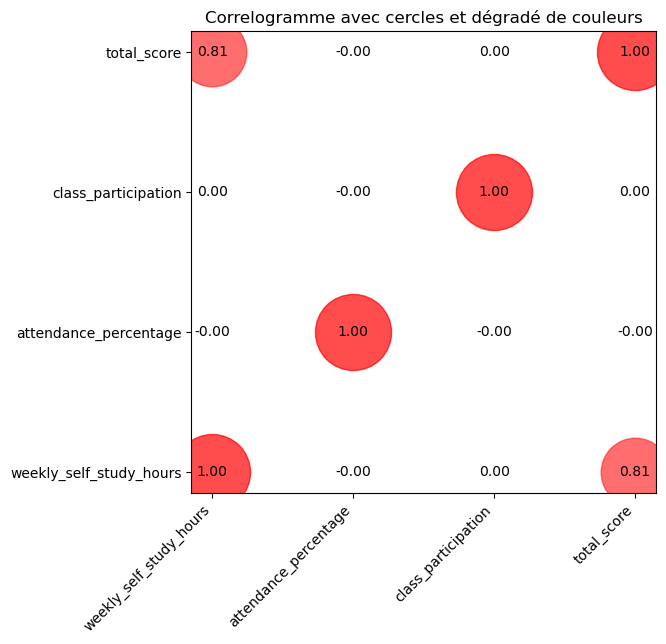

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Calculer la matrice de corr√©lation
corr = df[['weekly_self_study_hours','attendance_percentage',
           'class_participation','total_score']].corr()

fig, ax = plt.subplots(figsize=(6,6))

# Cr√©ation du d√©grad√© de couleurs
cmap = plt.cm.bwr  # Bleu ‚Üí Blanc ‚Üí Rouge

for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        value = corr.iloc[i,j]
        size = np.abs(value) * 3000  # Taille du cercle
        color = cmap((value + 1)/2)  # Normalisation de -1‚Üí1 √† 0‚Üí1
        ax.scatter(j, i, s=size, c=[color], alpha=0.7)
        ax.text(j, i, f"{value:.2f}", ha='center', va='center', color='black')

# Labels
ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=45, ha='right')
ax.set_yticklabels(corr.columns)

plt.title("Correlogramme avec cercles et d√©grad√© de couleurs")
plt.show()

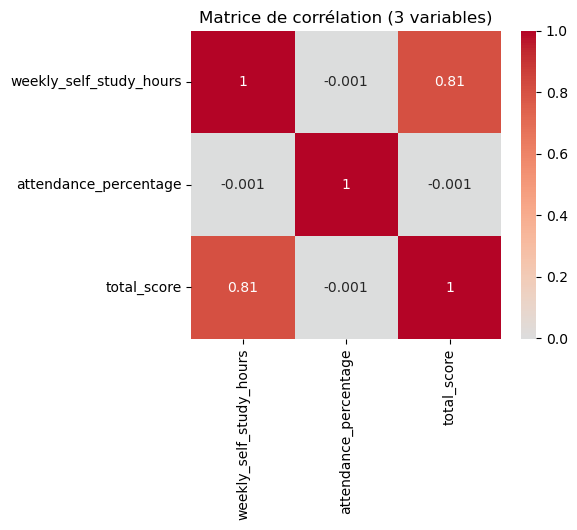

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['weekly_self_study_hours', 'attendance_percentage', 'total_score']
corr = df[cols].corr()

plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Matrice de corr√©lation (3 variables)")
plt.show()

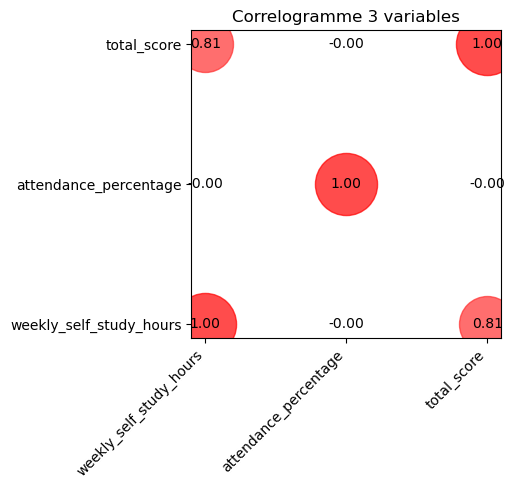

In [24]:
import matplotlib.pyplot as plt
import numpy as np

cols = ['weekly_self_study_hours', 'attendance_percentage', 'total_score']
corr = df[cols].corr()

fig, ax = plt.subplots(figsize=(4,4))

cmap = plt.cm.bwr

for i in range(len(cols)):
    for j in range(len(cols)):
        value = corr.iloc[i,j]
        size = np.abs(value) * 2000  # taille ajust√©e pour 3x3
        color = cmap((value + 1)/2)
        ax.scatter(j, i, s=size, c=[color], alpha=0.7)
        ax.text(j, i, f"{value:.2f}", ha='center', va='center', color='black')

ax.set_xticks(range(len(cols)))
ax.set_yticks(range(len(cols)))
ax.set_xticklabels(cols, rotation=45, ha='right')
ax.set_yticklabels(cols)

plt.title("Correlogramme 3 variables")
plt.show()

In [42]:
import scipy.stats as st

mean_score = df['total_score'].mean()
sem_score = st.sem(df['total_score'])  # erreur standard
ci = st.t.interval(0.95, len(df['total_score'])-1, loc=mean_score, scale=sem_score)

print("Moyenne :", mean_score)
print("IC 95% :", ci)

Moyenne : 84.28384529999998
IC 95% : (np.float64(84.25359720041378), np.float64(84.31409339958618))


In [45]:
#R√©gression lin√©aire
# import statsmodels.api as sm

# Variables explicatives (X) et cible (y)
X = df[['weekly_self_study_hours', 'attendance_percentage',
        'class_participation', 'grade_num']]  # grade transform√© en num√©rique si besoin
y = df['total_score']

# Ajouter une constante pour l'intercept
X = sm.add_constant(X)

# Mod√®le de r√©gression lin√©aire
model = sm.OLS(y, X).fit()

# R√©sum√© complet
print(model.summary())

# IC 95% des coefficients
print("\nIC 95% des coefficients :")
print(model.conf_int())

                            OLS Regression Results                            
Dep. Variable:            total_score   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                 3.344e+06
Date:                Thu, 25 Sep 2025   Prob (F-statistic):               0.00
Time:                        13:08:03   Log-Likelihood:            -2.8227e+06
No. Observations:             1000000   AIC:                         5.645e+06
Df Residuals:                  999995   BIC:                         5.645e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

üîπ R√©sum√© du mod√®le

R¬≤ = 0,93 ‚Üí Ton mod√®le explique 93 % de la variation des scores. ‚Üí C‚Äôest tr√®s fort : tes variables sont de bons pr√©dicteurs.

Taille de l‚Äô√©chantillon = 1 000 000 ‚Üí r√©sultats tr√®s stables (les IC sont tr√®s serr√©s).

üîπ Interpr√©tation variable par variable

Constante (Intercept ‚âà 33,2)

C‚Äôest le score de base, quand toutes les variables explicatives = 0.

Pas vraiment interpr√©table en pratique, mais n√©cessaire pour le mod√®le.

Heures d‚Äô√©tude par semaine (weekly_self_study_hours)

Coefficient = 0,52

IC95% ‚âà [0,52 ; 0,53]

‚Üí Chaque heure d‚Äô√©tude suppl√©mentaire augmente le score d‚Äôenviron 0,5 point.

Tr√®s significatif (p < 0.001).

Taux de pr√©sence (attendance_percentage)

Coefficient ‚âà 0,000006

IC95% ‚âà [-0,001 ; 0,001]

p-value = 0,988 ‚Üí pas significatif.

‚Üí La pr√©sence n‚Äôa pas d‚Äôeffet mesurable sur le score dans ton mod√®le.

Participation en classe (class_participation)

Coefficient ‚âà -0,002

IC95% ‚âà [-0,006 ; 0,002]

p-value = 0,33 ‚Üí pas significatif.

‚Üí La participation ne semble pas influencer le score (dans ce dataset).

Grade (grade_num)

Coefficient = 13,1

IC95% ‚âà [13,1 ; 13,12]

‚Üí Chaque grade sup√©rieur (ex. de B √† A) augmente le score d‚Äôenviron 13 points.

Effet tr√®s fort et tr√®s significatif.

üîπ √Ä pr√©senter simplement

üëâ En r√©sum√©, tu pourrais dire :

¬´ Notre mod√®le est tr√®s pr√©cis (R¬≤ = 0,93). Il montre que deux variables expliquent principalement les scores :

Le nombre d‚Äôheures d‚Äô√©tude : +0,5 point au score par heure suppl√©mentaire.

Le grade : environ +13 points par niveau de grade.

En revanche, la pr√©sence et la participation n‚Äôont pas d‚Äôimpact significatif dans ce dataset. ¬ª

=== Decision Tree ===
MSE: 135.23, R¬≤: 0.432

=== Random Forest ===
MSE: 82.16, R¬≤: 0.655



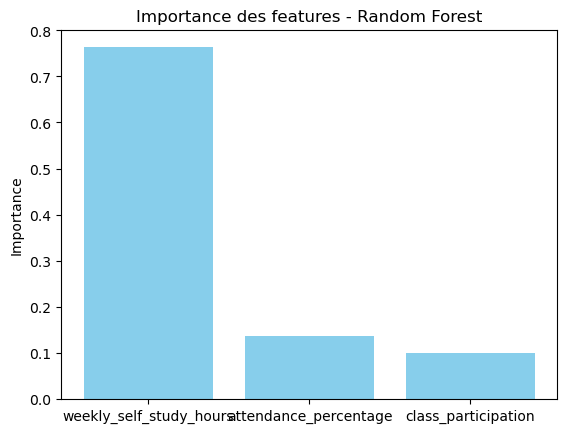

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# -------------------------------
# 1Ô∏è‚É£ Charger les donn√©es
# -------------------------------
# Supposons que ton dataframe s'appelle df
# Features num√©riques
features_list = ["weekly_self_study_hours", "attendance_percentage", "class_participation"]
X = df[features_list]
y = df["total_score"]

# -------------------------------
# 2Ô∏è‚É£ Split train/test
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------------
# 3Ô∏è‚É£ Optionnel : standardisation (pas n√©cessaire pour Decision Tree / Random Forest)
# -------------------------------
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# -------------------------------
# 4Ô∏è‚É£ Decision Tree
# -------------------------------
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("=== Decision Tree ===")
print(f"MSE: {mse_dt:.2f}, R¬≤: {r2_dt:.3f}")
print()

# -------------------------------
# 5Ô∏è‚É£ Random Forest
# -------------------------------
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("=== Random Forest ===")
print(f"MSE: {mse_rf:.2f}, R¬≤: {r2_rf:.3f}")
print()

# -------------------------------
# 6Ô∏è‚É£ Optionnel : importance des features (Random Forest)
# -------------------------------
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
plt.bar(features_list, importances, color='skyblue')
plt.title("Importance des features - Random Forest")
plt.ylabel("Importance")
plt.show()

